# About Data

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data was collected from the 1994 U.S. Census. The data we investigate here consists of small changes to the original dataset, such as removing ill-formatted entries.


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **fnlwgt**: continuous.
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

### Gathering data

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import fbeta_score, accuracy_score, make_scorer
from sklearn.preprocessing import MinMaxScaler
from time import time
from sklearn.base import clone
# pipline module i created before
from Training_and_Predicting_Pipeline import train_predict
plt.rcParams['figure.figsize'] = (20, 6)

In [47]:
# read in two files and concat together
def dfpipline(filelist):
    dflist=[]
    for file in filelist:
        if file == 'adult.data':
            header='infer'
        elif file == 'test.data':
            header=0
        df=pd.read_csv(file,sep=',',header=header,names=['age',
                                                         'workclass',
                                                         'fnlwgt',
                                                         'education_level',
                                                         'education_num',
                                                         'marital_status',
                                                         'occupation',
                                                         'relationship',
                                                         'race',
                                                         'sex',
                                                         'capital_gain',
                                                         'capital_loss',
                                                         'hours_per_week',
                                                         'native_country',
                                                         'income'])
        dflist.append(df)
    df=dflist[0].append(dflist[1])
    df.reset_index(inplace=True,drop=True)
    return df

In [48]:
df= dfpipline(['adult.data','test.data'])

In [49]:
df

,age,workclass,fnlwgt,education_level,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


### Assessing data

In [50]:
# strip all object elements before clean
df[list(df.select_dtypes(['object']))]=df.select_dtypes(['object']).applymap(lambda x: x.strip().strip('.'))

In [51]:
# Nan 
df.isna().sum().sum()

0

In [52]:
# missing values
df[df.values=='?']

,age,workclass,fnlwgt,education_level,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48812,81,?,26711,Assoc-voc,11,Married-civ-spouse,?,Husband,White,Male,2936,0,20,United-States,<=50K
48812,81,?,26711,Assoc-voc,11,Married-civ-spouse,?,Husband,White,Male,2936,0,20,United-States,<=50K
48826,50,Local-gov,139347,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,?,>50K
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K


In [53]:
# replace nan back
df.replace('?',np.nan,inplace=True)

In [54]:
# nans
df.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education_level       0
education_num         0
marital_status        0
occupation         2809
relationship          0
race                  0
sex                   0
capital_gain          0
capital_loss          0
hours_per_week        0
native_country      857
income                0
dtype: int64

In [55]:
print('There are total {} Nans.'.format(df.isna().sum().sum()))

There are total 6465 Nans.


In [56]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education_level  48842 non-null  object
 4   education_num    48842 non-null  int64 
 5   marital_status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   sex              48842 non-null  object
 10  capital_gain     48842 non-null  int64 
 11  capital_loss     48842 non-null  int64 
 12  hours_per_week   48842 non-null  int64 
 13  native_country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


> all the data types are correct

In [57]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [58]:
# duplicates
df[df.duplicated()].shape

(52, 15)

In [59]:
# drop duplicates
df.drop_duplicates(inplace=True)
# reset index
df.reset_index(inplace=True,drop=True)

In [60]:
df.shape

(48790, 15)

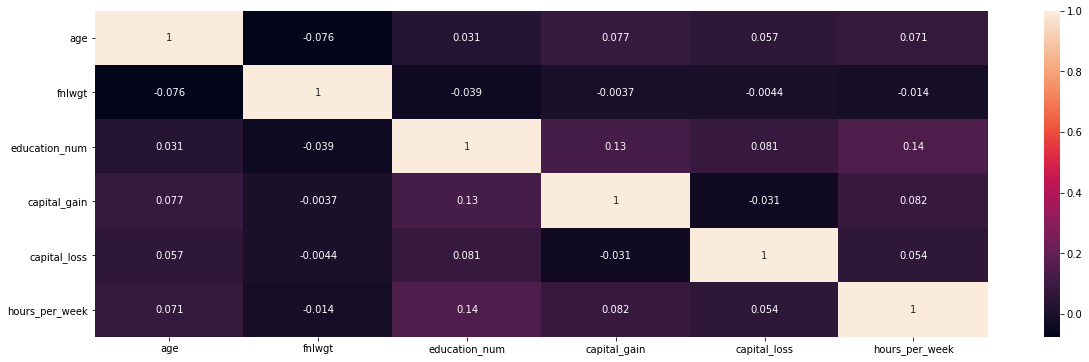

In [61]:
# correlation heatmap
sns.heatmap(df.corr(),annot=True);

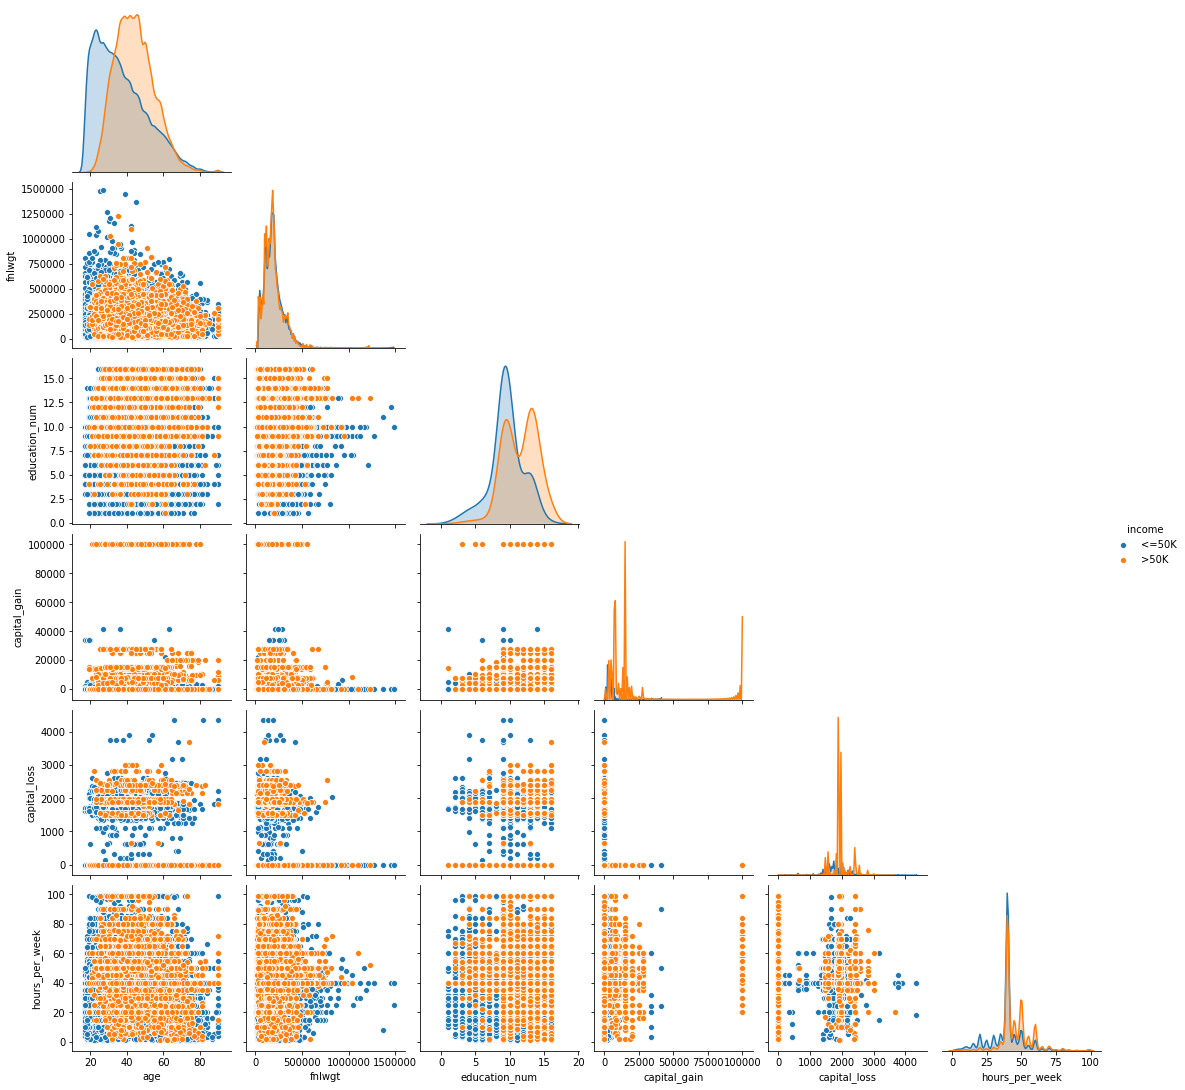

In [62]:
sns.pairplot(df, corner=True,hue='income',diag_kws={'bw':1.0});

### Data Wrangling

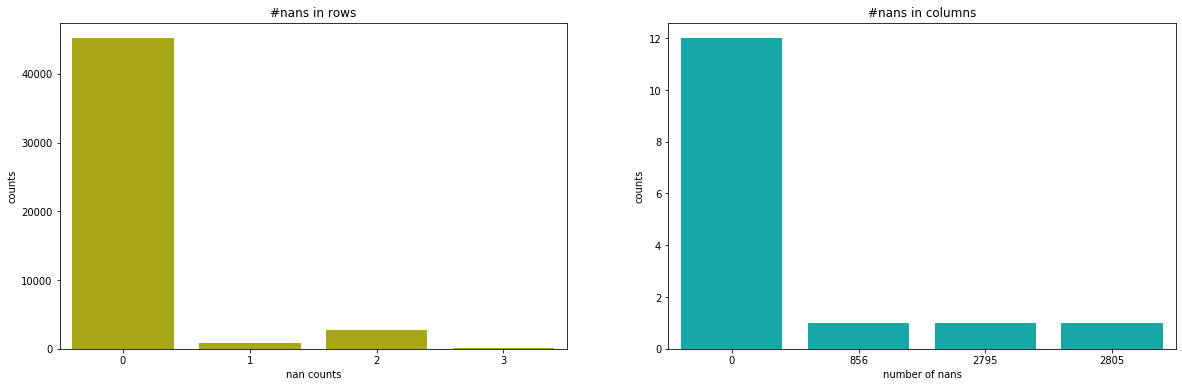

In [63]:
# assessing missing data in each row
#plt.figure(figsize=(20,6))

plt.subplot(121)
rowmiss=df.isna().sum(axis=1)
sns.countplot(rowmiss.values,color='y')
plt.title('#nans in rows')
plt.xlabel('nan counts')
plt.ylabel('counts')

# assessing missing data in each column
plt.subplot(122)
colmiss=df.isna().sum()
sns.countplot(colmiss.values, color='c')
plt.title('#nans in columns')
plt.xlabel('number of nans')
plt.ylabel('counts');

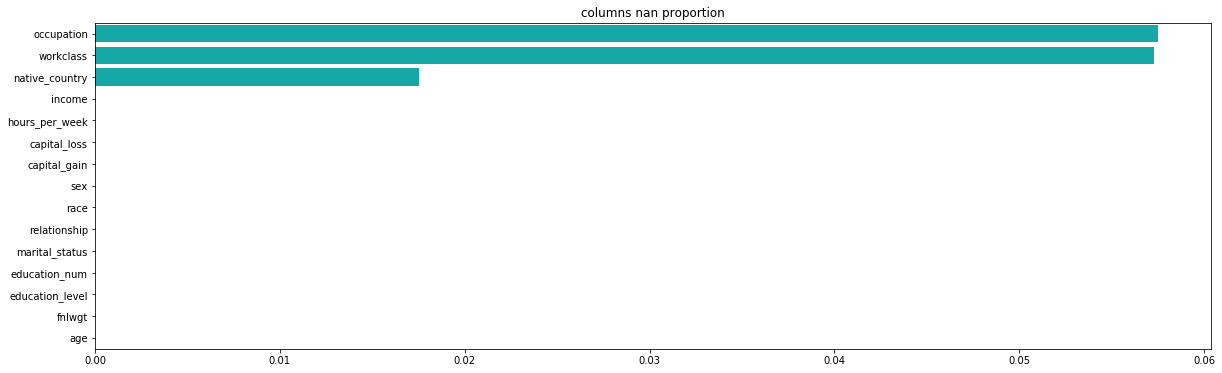

In [64]:
misspro=df.isna().mean().sort_values(ascending=False)
sns.barplot(y=misspro.index,x=misspro.values,color='c')
plt.title('columns nan proportion');

In [65]:
print('proportion of rows contain Nan in the dataset :{0:.2f}'.format(100*df.isna().any(axis=1).mean()))

proportion of rows contain Nan in the dataset :7.41


> I decided to ignore the Nans for now as they are smaller than 6% in ech columns, and only 7.41% of the entire dataset. All of them are categorical variables. As we are proceeding exploratory and explanatory analysis, this won't have a big impact of our insight. We will come back and handle the missing values later when we proceed ML training and predicting.

In [66]:
# drop fnlwgt
df.drop(['fnlwgt'],axis=1,inplace=True)

In [67]:
# one hot encoding income
df=pd.get_dummies(data=df, columns=['income'],drop_first=True)

* With the process above, the data set is clean enough for general anaysis purpose. Next I will proceed wrangling and get the data ready for ML purpose.

###### Transforming Skewed Continuous Features
As the distplot showing below, for highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

In [68]:
# plot func
def twodistplot(dataframe):
    '''input: a dataframe either in original 'capital_gain','capital_loss'
            or a post-transformated format
    '''
    
    sublist=[121,122]
    collist=['capital_gain','capital_loss']
    #plt.figure(figsize=(20,6))
    for position, column in zip(sublist,collist):
        plt.subplot(position)
        sns.distplot(dataframe[column],kde=False)
        plt.ylim(0,2000)
        plt.title('{} distrubution'.format(column))
        plt.ylabel('counts')
    if (dataframe['capital_gain']==df['capital_gain']).all():
        plt.suptitle(t='Skewed Distributions',fontsize=15)
    elif (dataframe['capital_gain']==df_logtrans['capital_gain']).all():
        plt.suptitle(t='Log_transformed Distributions',fontsize=15)

In [69]:
# log transformation
df_logtrans=df.copy()
df_logtrans[['capital_gain','capital_loss']]=df[['capital_gain','capital_loss']].apply(lambda x : np.log(x+1))

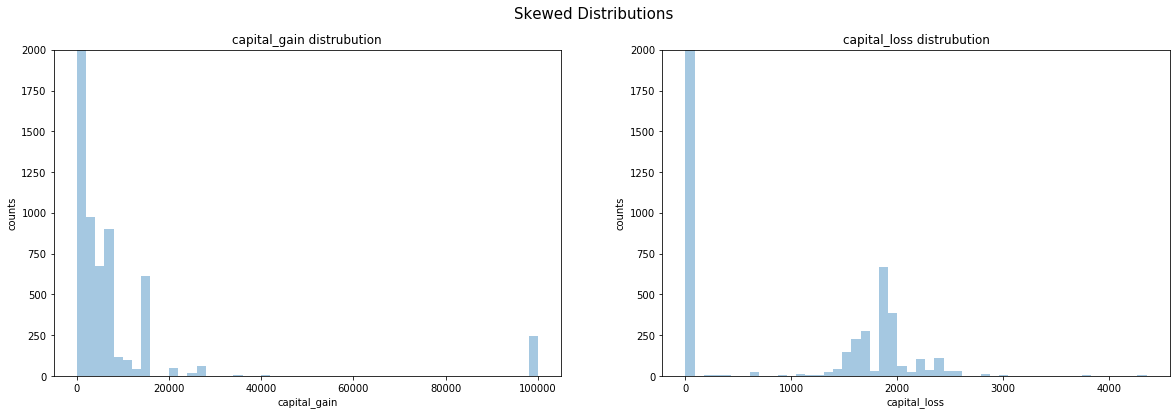

In [70]:
# Skewed Distributions plot
twodistplot(df)

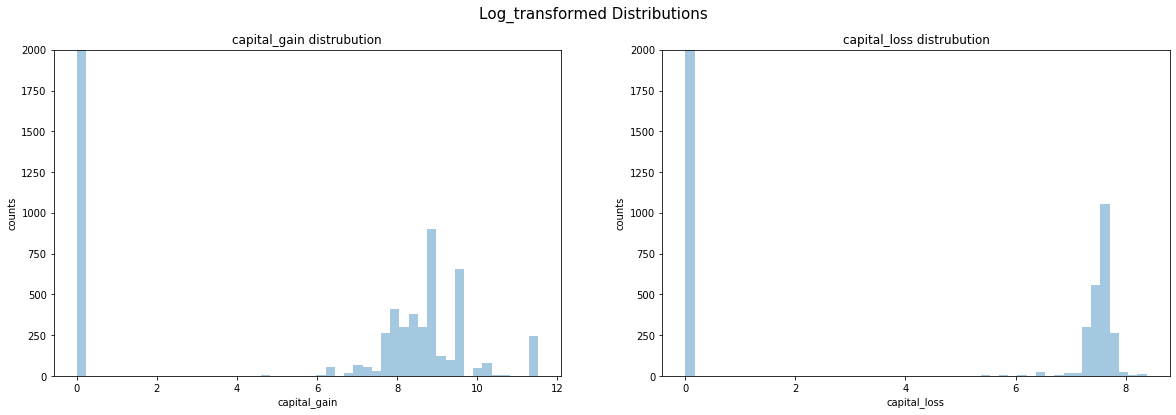

In [71]:
# transformed Distributions plot
twodistplot(df_logtrans)

In [72]:
df_logtrans.head()

,age,workclass,education_level,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_>50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,7.684784,0.0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,40,Cuba,0


In [73]:
# drop nan
df_logtrans.dropna(inplace=True)

In [74]:
# assign X y
y=df_logtrans['income_>50K']
X=df_logtrans.iloc[:,:-1]

In [75]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45175 entries, 0 to 48789
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45175 non-null  int64  
 1   workclass        45175 non-null  object 
 2   education_level  45175 non-null  object 
 3   education_num    45175 non-null  int64  
 4   marital_status   45175 non-null  object 
 5   occupation       45175 non-null  object 
 6   relationship     45175 non-null  object 
 7   race             45175 non-null  object 
 8   sex              45175 non-null  object 
 9   capital_gain     45175 non-null  float64
 10  capital_loss     45175 non-null  float64
 11  hours_per_week   45175 non-null  int64  
 12  native_country   45175 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 4.8+ MB


###### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.


We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [76]:
X[X.select_dtypes(['int64','float64']).columns]=MinMaxScaler().fit_transform(X.select_dtypes(['int64','float64']))

###### One-hot encoding categorical variables

In [77]:
X=pd.get_dummies(X)
X.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,0.301370,0.800000,0.667492,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.000000,0.0,0.122449,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Analysis

**1.Q1: Is there an age and/or race discrimination back in the 90s in terms of income>50K?**

In [78]:
df_logtrans.groupby(['race','sex'])['income_>50K'].mean().sort_values()

race                sex   
Black               Female    0.060461
Other               Female    0.071429
Amer-Indian-Eskimo  Female    0.084337
White               Female    0.122599
Amer-Indian-Eskimo  Male      0.144981
Asian-Pac-Islander  Female    0.149083
Other               Male      0.158590
Black               Male      0.190387
White               Male      0.324034
Asian-Pac-Islander  Male      0.351445
Name: income_>50K, dtype: float64

In [79]:
df_logtrans.groupby(['race'])['income_>50K'].mean().sort_values()

race
Amer-Indian-Eskimo    0.121839
Black                 0.126331
Other                 0.127479
White                 0.262513
Asian-Pac-Islander    0.283628
Name: income_>50K, dtype: float64

In [80]:
df_logtrans.groupby(['race'])['income_>50K'].mean().max()-df_logtrans.groupby(['race'])['income_>50K'].mean().min()

0.1617888980183237

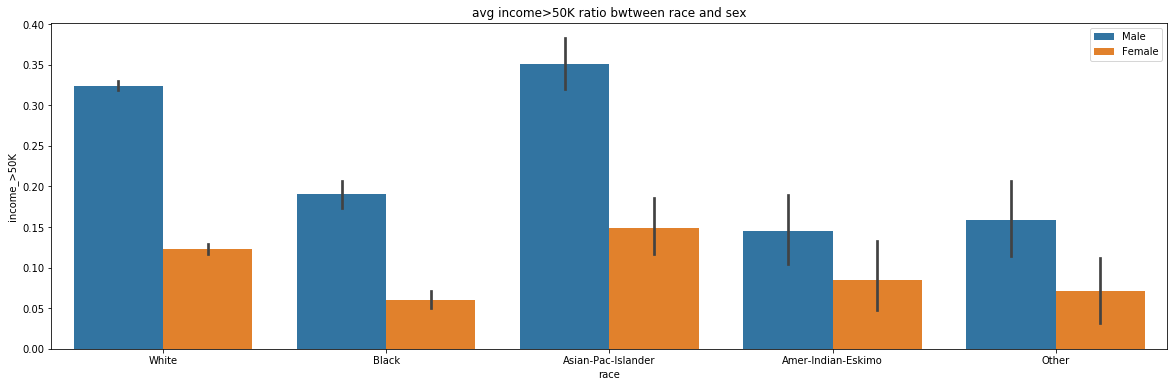

In [81]:
sns.barplot(data=df_logtrans, x='race',y='income_>50K',hue='sex')
plt.title('avg income>50K ratio bwtween race and sex')
plt.legend(loc=0);

> As we can see from the plot, there are some significant difference between some groups. One very obvious trend is female earning over 50K/yr ratio are lower than male in any race. This might suggest there were some sex discrimination back in the 90s. Looking at the race side, the difference between highest and lowest ratios are again, very noticeable (16.2%), lies between Asian-Pac-Islander and Amer-Indian-Eskimo race. But we should keep in mind this census data set is from mid-90s, the time value of data change should be taken into consideration.

**2. Difference between income>50K and income<=50 in terms of age and working hr?**

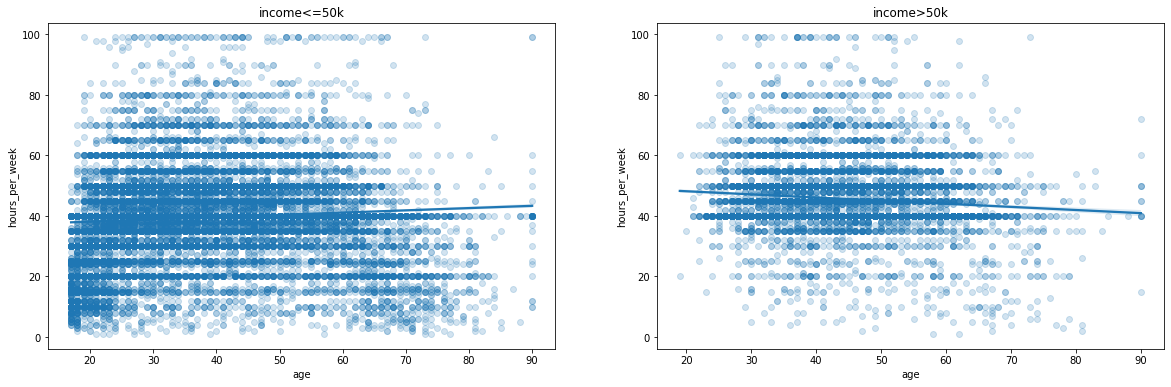

In [82]:
plt.subplot(121)
sns.regplot(data=df_logtrans[df_logtrans['income_>50K']==0], x='age',y='hours_per_week',scatter_kws={'alpha':.2})
plt.title('income<=50k')
plt.subplot(122)
sns.regplot(data=df_logtrans[df_logtrans['income_>50K']==1], x='age',y='hours_per_week',scatter_kws={'alpha':.2})
plt.title('income>50k');

> When we look at the scatter plot above, we can clearly see two clusters. For cohort make over 50k, people are aged between 25 and 65, working hours/week are from 38 to 60 hours; For cohort make equal or less than 50k, age range is wider, around 18 to 70, and wokring hour/week is between 0 to 60. It also worth to notice there is a small group aged around 90, work 40 hr/week but make less or equal to 50K.

> There is another interesting fact indicated by KDE (Kernel Density Estimates). Despite the correlationships are not very strong, we can see there is a slightly increase work hour/week along with age increase for people make 'less' while it is the opposite for people who make 'more'. Although this could highly due to the affects of outliers, it just proved the point there are more elder people working long hours in income<=50k cluster than in income>50k cluster. Below are two outlier records which are indicated by the dots on the top right corner of 'income<=50k' plot.

In [83]:
df_logtrans.query("age==90 and hours_per_week>90")

,age,workclass,education_level,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_>50K
15350,90,Private,HS-grad,9,Widowed,Transport-moving,Unmarried,White,Male,0.0,0.0,99,United-States,0
40952,90,Federal-gov,Masters,14,Divorced,Prof-specialty,Not-in-family,White,Male,0.0,0.0,99,United-States,0


**3. ML predicts an individual's general income bracket**

While it can be difficult to determine an individual's general income bracket directly from public sources, we can infer this value from other publically available features. 

In [84]:
X

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,0.301370,0.800000,0.667492,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.000000,0.0,0.122449,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48784,0.219178,0.800000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48785,0.301370,0.800000,0.000000,0.0,0.357143,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48787,0.287671,0.800000,0.000000,0.0,0.500000,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48788,0.369863,0.800000,0.747375,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [85]:
# split train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2, random_state=42)
print('Train set has {} samples.'.format(X_train.shape[0]))
print('Test set has {} samples.'.format(X_test.shape[0]))

Train set has 36140 samples.
Test set has 9035 samples.


######  Creating a Training and Predicting Pipeline

I imported a pipline I created before called ``train_predcit`` to process the data. For demonstration purpose I recreate the pipline in the markdown cell. One modification is I changed f_beta=0.5 to f1 as an evaluation metric.

Porcess:
- Import `f1_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
- Fit the learner to the sampled training data and record the training time.
- Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
    - Record the total prediction time.
- Calculate the accuracy score for both the training subset and testing set.
- Calculate the F-score for both the training subset and testing set.

```
def train_predcit(learner, sample_size, X_train, y_train, X_test, y_test):
    # import moduals
    from time import time
    from sklearn.metrics import f1_score, accuracy_score
    result={}
    
    # Fit the learner to the sampled training data and record the training time.
    start=time()
    clf=learner.fit(X_train[:sample_size],y_train[:sample_size])
    end=time()
    # Calculate the training time
    result['train_time']=end-start
    print('train time:',result['train_time'])
    
    # Get the predictions on the test set(X_test)
    start= time()
    test_predict=clf.predict(X_test)
    # get predictions on the first 300 training samples(X_train) using .predict()
    train_predict=clf.predict(X_train[:300])
    end=time()
    # Calculate the predicting time
    result['pred_time']=end-start
    print('predict time:',result['pred_time'])
    
    # Calculate the accuracy score for both the training subset and testing set.
    result['acc_train']=accuracy_score(y_train[:300], train_predict)
    result['acc_test']=accuracy_score(y_test, test_predict)
    # Calculate the F-score for both the training subset and testing set.
    result['f_train']=f1_score(y_train[:300], train_predict)
    result['f_test']=f1_score(y_test, test_predict)
    
    print("{} trained on {} samples.".format(clf.__class__.__name__,sample_size))
    return result
```

In [86]:
train_predict?

In [87]:
# instantiate classifiers
rfclf=RandomForestClassifier(random_state=42)
adaclf=AdaBoostClassifier(random_state=42)
bagclf=BaggingClassifier(random_state=42)

In [88]:
# function to interprets the result
def getresult(clflist):
    '''
    input:
    - clflist need to be a list of instantiated classifiers
    e.g: getresult([rfclf,adaclf,bagclf])
    '''
    results={}
    for clf in clflist:
        clf_name=clf.__class__.__name__
        results[clf_name]={}
        # 50% of training data
        scores=train_predict(clf,int(len(X_train)*.5), X_train, y_train, X_test, y_test)
        for k,v in scores.items():
            results[clf_name][k]=v
    print('\n')
    
    for k, v in results.items():
        print(k+':')
        for kk,vv in v.items():
            print(kk,vv)
        print('\n')

In [89]:
getresult([rfclf,adaclf,bagclf])

RandomForestClassifier trained on 18070 samples.
AdaBoostClassifier trained on 18070 samples.
BaggingClassifier trained on 18070 samples.


RandomForestClassifier:
train_time 2.971057891845703
pred_time 0.25830912590026855
acc_train 0.98
acc_test 0.8415052573325955
f_train 0.963855421686747
f_test 0.6782182970144957


AdaBoostClassifier:
train_time 1.566821813583374
pred_time 0.2353668212890625
acc_train 0.8466666666666667
acc_test 0.8564471499723298
f_train 0.7407407407407408
f_test 0.7182435964453738


BaggingClassifier:
train_time 1.427222490310669
pred_time 0.10970568656921387
acc_train 0.97
acc_test 0.8419479800774765
f_train 0.9620253164556962
f_test 0.6820709879664274




> From the result we can tell Adaboost algorithms outperformed other two algorithms. It has the heighest f_score and accurate score on test set with a decent train time.

###### Model Tuning

Process:
- Import [`sklearn.grid_search.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [ ]:
time0=time()
# Initialize the classifier
clf= AdaBoostClassifier(random_state=42)
# Create a dictionary of parameters
parameters={'base_estimator':[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
            'n_estimators':[50,500],
            'learning_rate':[.01,.1,.5]}

# Use make_scorer to create an fbeta_score scoring object (with  𝛽=0.5 )
scorer=make_scorer(fbeta_score,beta=.5)

# Perform grid search on the classifier clf using the 'scorer', and store it in grid_obj
grid_obj=GridSearchCV(clf,parameters,scoring=scorer)

# Fit the grid search object to the training data (X_train, y_train), and store it in grid_fit.
grid_fit=grid_obj.fit(X_train, y_train)

# get the best estimator
best_clf=grid_fit.best_estimator_
    
# best parameters
#best_prem=grid_fit.best_params_
    
    
# prediction with/without bset_clf
pre=clf.fit(X_train, y_train).predict(X_test)
best_pre=best_clf.predict(X_test)

# evaluation
# og model
acc_og=accuracy_score(y_test,pre)
f_og=fbeta_score(y_test,pre,beta=.5)
# tuned model
acc_tuned=accuracy_score(y_test,best_pre)
f_tuned=fbeta_score(y_test,best_pre,beta=.5)

# duration
full_time=time()-time0

# print results
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(acc_og))
print("F.5 socre on testing data: {:.4f}".format(f_og))
print("\nOptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(acc_tuned))
print("F.5 socre on testing data: {:.4f}".format(f_tuned))
print("\nDuration:{:.4f}".format(full_time))
print("Best model:",best_clf)

> Final accuracy is 0.8695 and F-score is 0.7496

----
###### Extracting Feature Importance

Process:

 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

In [ ]:
# extract feature_importances_
importances=best_clf.fit(X_train,y_train).feature_importances_
# get desc sorted indices
indices=np.argsort(importances)[::-1][:5]
# match columns with importances
weights=importances[indices]
features=X_train.columns.values[indices]
# create df
running_total=np.cumsum(weights)
dic={'features':features,
     'weights':weights,
     'running_total_weights':running_total}
feature_extract_df=pd.DataFrame(dic)
feature_extract_df.head()

In [ ]:
# plot top 5 features
sns.set_colors('muted')
sns.barplot(data=feature_extract_df,x='features',y='weights',label='feature_importances',color='b')
sns.set_colors('pastel')
sns.barplot(data=feature_extract_df,x='features',y='running_total_weights',label='running_total_weights',color='b')
plt.legend(loc=0)
plt.title('Weights for first five most prodictive features')
plt.show;

> Here we can the most five feature with the most weights are..... The cumulative feature weightis is well over 50%. This hints that we can attempt to reduce the feature space and simplify the information required for the model to learn. The code cell below will use the same optimized model I found earlier, and train it on the same training set with only the top five important features.

In [ ]:
time0=time()
# Reduce the feature space
X_train_reduced,X_test_reduced=X_train[features],X_test[features]

# Train on the "best" model found from grid search earlier
clf=(clone(best_clf)).fit(X_train_reduced,y_train)

# Make new predictions
reduced_predictions=clf.predict(X_test_reduced)

# evaluation
acc_reduce=accuracy_score(y_test,reduced_predictions)
f_reduce=fbeta_score(y_test,f_reduce,beta=.5)

# duration
reduc_time=time()-time0
# print results
print("Final Model trained on full data\n------")
print("Accuracy score on testing data: {:.4f}".format(acc_tuned))
print("F.5 socre on testing data: {:.4f}".format(f_tuned))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy score on testing data: {:.4f}".format(acc_reduce))
print("F.5 socre on testing data: {:.4f}".format(f_reduce))
print("\nDuration:{:.4f}".format(reduc_time))

In [ ]:
print('Accuracy dropped:{:.3f}'.format((acc_tuned-acc_reduce)/acc_tuned))
print('F_score dropped:{:.3f}'.format((f_tuned-f_reduce)/f_tuned))
print('Time sepnt reduced: {:.3f}'.format((full_time-reduc_time)/full_time))

> - both Accuracy and F-score dropped by using only 5 features. Accuracy is 3.05% less than best_predictions and F-score is 6.3% less. 
- when we look at the time consumed, use 5 features is 99.14% fatser than use all the features.
- take all factors into consideration, use 5 key metrics is much less expensive, the small percentage of F-score dropped is a reasonable tradeoff.